<h3>Boltzmann Machine em uma Aplicação Real com Redução de Dimensionalidade</h3>
<p>Na fabricação de ligas metálicas alguns fatores como composição química, temperatura de fundição e resfriamento, nível de impurezas e diversos outros aspectos físico-químicos poderão influenciar no grau de qualidade dessa liga. No exemplo a seguir temos 28 fatores anônimos que irão exercer influência na coluna de classificação final correspondente ao grau de qualidade de cada liga classificada com base na durabilidade, resistência, flexibilidade, leveza e diversos outros aspectos.</p>

<h4>Exploração e Visualização dos Dados</h4>

In [8]:
from Neuraline.Utilities.data import DataTable, DataExploration
from Neuraline.Utilities.chart import Chart
data_table, data_exploration,chart = DataTable(), DataExploration(), Chart()
url_path = './metal_alloys.csv'
result = data_table.visualization_csv_inline(url_path=url_path, limit=10)
types = data_exploration.getOutputTypesCSV(url_path=url_path, output_column='grade')
print(f'Tipos de liga presentes: {sorted(types)}')

╒════════════╤══════════╤═══════════╤═════════╤═══════════╤═══════════╤═══════════╤══════════╤══════════╤══════╤═══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤═══════════╤═══════════╤══════════╤═══════════╤══════════╤═══════════╤═════════════╤═══════════╤═══════════╤══════════╤═══════════╤══════════╤═════════╕
│         f0 │       f1 │        f2 │      f3 │        f4 │        f5 │        f6 │       f7 │       f8 │   f9 │       f10 │       f11 │       f12 │       f13 │      f14 │       f15 │       f16 │       f17 │      f18 │       f19 │      f20 │       f21 │         f22 │       f23 │       f24 │      f25 │       f26 │      f27 │   grade │
╞════════════╪══════════╪═══════════╪═════════╪═══════════╪═══════════╪═══════════╪══════════╪══════════╪══════╪═══════════╪═══════════╪═══════════╪═══════════╪══════════╪═══════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╪═══════════╪═════════════╪═══════════╪═══════════╪══════════╪═══════════╪══════════╪═══

<h4>Sem Algoritmo de Redução de Dimensionalidade</h4>

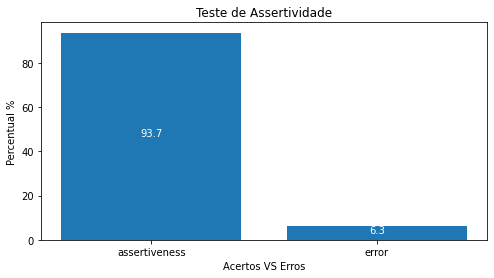

In [21]:
list_inputs, list_outputs = [f'f{x}' for x in range(28)], ['grade']
inputs_train, outputs_train, inputs_test, outputs_test = data_exploration.dataSeparationCSV(url_path=url_path, list_inputs=list_inputs, list_outputs=list_outputs, training_percentage=.8, test_percentage=.2)
from Neuraline.ArtificialIntelligence.MachineLearning.SupervisedLearning.k_nearest_neighbors import KNearestNeighbors
model = KNearestNeighbors()
model.fit(inputs=inputs_train, outputs=outputs_train)
result_test = model.test(inputs=inputs_test, outputs=outputs_test)
x, y = list(result_test.keys()), [y*100 for y in list(result_test.values())]
chart.plotBAR(x=x, y=y, x_label='Acertos VS Erros', y_label='Percentual %', title='Teste de Assertividade', bar_values=True)

<h4>Com Algoritmo de Redução de Dimensionalidade</h4>
<p>Redução da dimensionalidade dos atributos para a classificação de ligas metálicas.</p>

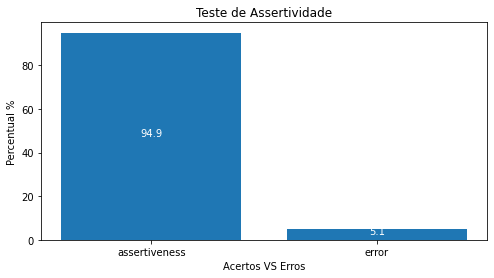

In [22]:
from Neuraline.ArtificialIntelligence.MachineLearning.AutonomousLearning.boltzmann_machine import BoltzmannMachine
boltzmann_machine = BoltzmannMachine()
number_of_elements = 5
inputs_train, inputs_test = boltzmann_machine.getResizing(inputs_train, number_of_elements), boltzmann_machine.getResizing(inputs_test, number_of_elements)
model = KNearestNeighbors()
model.fit(inputs=inputs_train, outputs=outputs_train)
result_test = model.test(inputs=inputs_test, outputs=outputs_test)
x, y = list(result_test.keys()), [y*100 for y in list(result_test.values())]
chart.plotBAR(x=x, y=y, x_label='Acertos VS Erros', y_label='Percentual %', title='Teste de Assertividade', bar_values=True)